# Use Astropy to analyze FITS images

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Open the FITS file

In [3]:
fname = "HorseHead.fits"
hdu_list = fits.open(fname)
hdu_list.info()

Filename: HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [4]:
# image data is in the primary block

image_data = hdu_list[0].data

In [5]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


# close FITS file

In [6]:
hdu_list.close()

In [7]:
# can use shortcut to read in image data and close the file: 
# image_data = fits.getdata(fname)

# Let's show the data

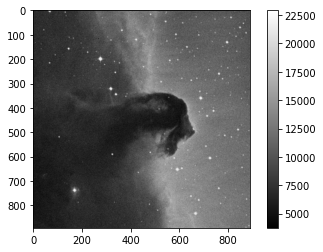

In [8]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

# Get some basic statistics about our image

In [9]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


# Plot a histogram

### we'll need to cast the data from 2-D array to 1-D, let's use ndarray.flatten()

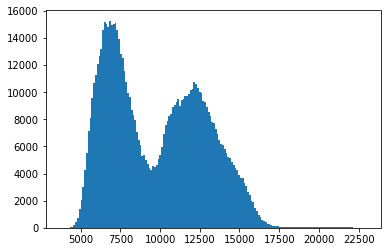

In [10]:
histogram = plt.hist(image_data.flatten(),bins='auto')

# Displaying the image with logarithmic color scale

In [12]:
from matplotlib.colors import LogNorm

[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

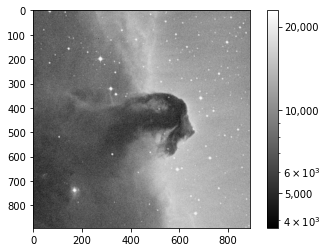

In [13]:
plt.imshow(image_data, cmap='gray', norm=LogNorm())

# Choose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

# Stacking images to improve the signal to noise ratio

### images of M13 galaxy

In [14]:
# make a list of filenames
image_list = ['M13_blue_0001.fits','M13_blue_0002.fits','M13_blue_0003.fits','M13_blue_0004.fits','M13_blue_0005.fits']

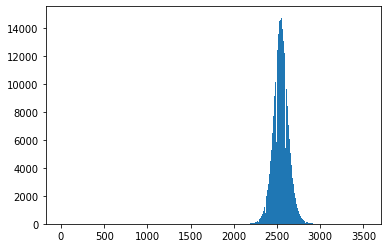

In [15]:
# make an array of images from the list of images
image_concat = [fits.getdata(image) for image in image_list]

# sum the images together
final_image = np.sum(image_concat, axis=0)

# plot a histogram of the image pixel values
image_hist = plt.hist(final_image.flatten(), bins='auto')

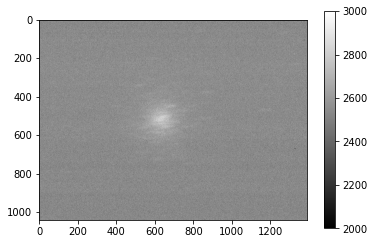

In [16]:
# here we use the keywords vmin and vmax to set limits on the color scaling for imshow

plt.imshow(final_image, cmap='gray', vmin=2E3, vmax=3E3)
plt.colorbar()

# Writing a new FITS file

In [17]:
# we write the file using the writeto() method
# you'll receive an error if the file you are trying to write already exist
#   so we use clobber=True

outfile = 'stacked_M13_blue.fits'
hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite=True)